In [69]:
from Aymeric.decode_img import get_img
import matplotlib.pyplot as plt
import numpy as np
from Thibault.test import *

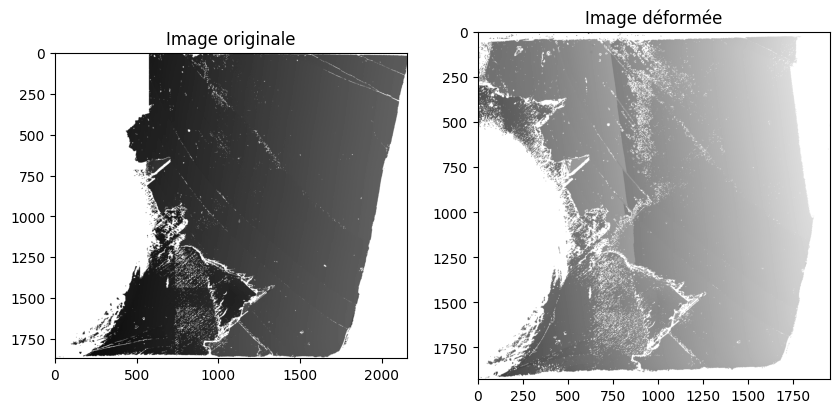

(1870, 2157)
242
(1928, 1956)


In [70]:
img1 = get_img('data\CALSPAR16C_init-to-d7\CALSPAR16C_d1_image2-20x.dat', type = 'phase')
img2 = get_img('data\CALSPAR16C_init-to-d7\CALSPAR16C_d3_image2-20x.dat', type = 'phase')

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title('Image déformée')
plt.show()

print(img1.shape)
print(img1[264, 85])

print(img2.shape)


In [71]:
def apply_recadr_2D(img, s,R,t):
    true_R = np.array([[R[0,0], R[0,1], 0], [R[1,0], R[1,1], 0], [0, 0, 1]])
    true_t = np.array([t[0], t[1], 0])
    
    YT = s * np.dot(img, true_R) + true_t   

    YT[:,:,0] -= YT[:,:,0].min() 
    YT[:,:,1] -= YT[:,:,1].min()
    


    tab = np.empty((YT[:,:,0].max().astype(int) + 1, YT[:,:,1].max().astype(int)+1))
    tab[YT[:, :, 0].astype(int), YT[:, :, 1].astype(int)] = YT[:, :, -1]
    return tab


(1870, 2157)
(1818, 1845)
1870 2157
-26 1844 -156 2001
(1818, 1845)


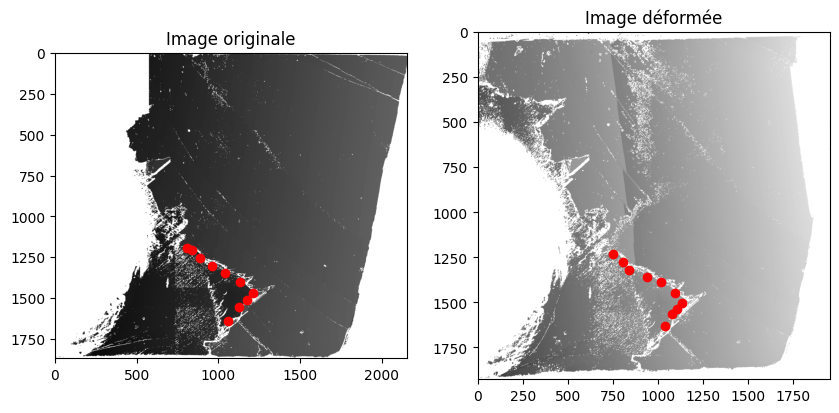

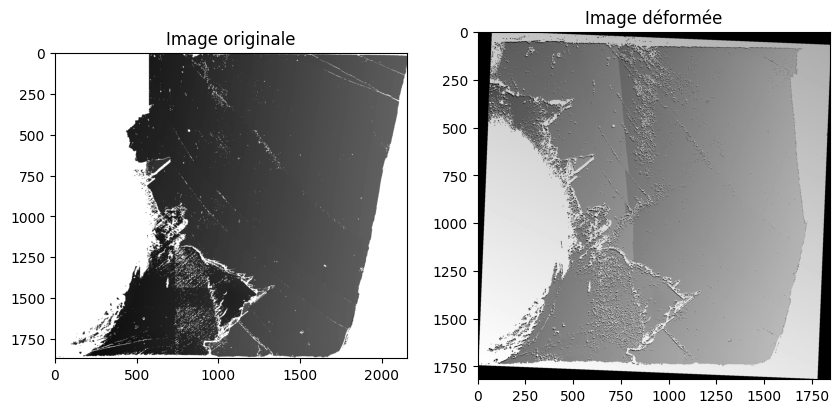

0.9070049295205621 [[ 0.99855207 -0.04029006  0.03564384]
 [ 0.04086186  0.99904517 -0.01546147]
 [-0.03498686  0.01689556  0.99924494]] [  2.70740132 205.04966305  83.07097578]


In [96]:
import json

with open('data//proj//project.json', 'r') as f :
    data = json.load(f)

l_p_1 = np.array(data['img_dict']['p1'][0])
l_p_2 = np.array(data['img_dict']['p1'][2])


l_p_1_augm = np.empty((l_p_1.shape[0], 3))
l_p_2_augm = np.empty((l_p_2.shape[0], 3))

l_p_1_augm[:,:2] = l_p_1
l_p_2_augm[:,:2] = l_p_2

l_p_1_augm[:,2] = img1[l_p_1[:,1].astype(int), l_p_1[:,0].astype(int)]
l_p_2_augm[:,2] = img2[l_p_2[:,1].astype(int), l_p_2[:,0].astype(int)]


s, R, t = recadrage_cpd(l_p_2_augm, l_p_1_augm)


img2_formt = format_img(img2)
img2_recad = apply_recadr(img2_formt, s, R, t)


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.plot(l_p_1[:,0], l_p_1[:,1], 'ro')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.plot(l_p_2_augm[:,0], l_p_2_augm[:,1], 'ro')
plt.title('Image déformée')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(img2_recad, cmap='gray')
plt.title('Image déformée')
plt.show()

print(s, R, t)

2
